# Pandas

Knihovna pro práci se statistickými daty, např. daty z měření.
Výhody:
- efektivní nástroje pro čtení a zápis dat v různých formátech (databáze, textové soubory, Excel, ...)
- data jsou uložena spou se svým významem
- snadná aplikace základních statistických operací
- snadná vizualizace (založeno na matplotlib)

In [4]:
# POZOR: Nutno instalovat moduly:'xlwt', 'xlrd'
# Pro Excel export, import.

import matplotlib.pyplot as plt
import pandas as pd 
#import matplotlib

## DataFrame

Základní datová struktura v Pandas, je `DataFrame`. Je to tabulka, která má pojmenované sloupce podle jednotlivých "veličin" a v řádcích jsou jednotlivá "pozorování". Vytvořme si tabulku jmen dětí s četností jejich používání (asi v Americe).

In [7]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

# We need lines of the table as tuples:
table = list(zip(names, births))
table

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [8]:
# Create the data frame
df = pd.DataFrame(data = table, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


## IO operace
Klíčové pro práci s daty je jejich načtení a zápis z růsných formátů. Vytvořená data zapíšeme a poté načteme.

In [21]:
# Write the dataframe into CSV file.
# Add column with line index.
# Write column header at the first row.
df.to_csv('births1880.csv', index=True, header=True)

# Other instance without index and header.
df.to_csv('births_raw.csv', index=False, header=False)

In [17]:
import os
current_dir = os.getcwd()
print(current_dir)

# Reading with full path, should not be necessary.
#path =  os.path.join(current_dir, 'births1880.csv')
#new_df = pd.read_csv(path)


new_df = pd.read_csv('births1880.csv')
new_df

/home/jb/workspace/ipython_notebooks/PAV_course


,Unnamed: 0,Names,Births
0,0,Bob,968
1,1,Jessica,155
2,2,Mary,77
3,3,John,578
4,4,Mel,973


In [35]:
# Enable explicit display call


# Set own column names
new_df = pd.read_csv('births1880.csv', names=['idx', 'name', 'freq'])
# Just text print, not so nice.
print(new_df)

# When no header, we have to tell it. Try both version.
#new_df = pd.read_csv('births_raw.csv')
new_df = pd.read_csv('births_raw.csv', header=None, names= ['name', 'freq'])

# Get nice table display.
from IPython.display import display
display(new_df)


   idx     name    freq
0  NaN    Names  Births
1  0.0      Bob     968
2  1.0  Jessica     155
3  2.0     Mary      77
4  3.0     John     578
5  4.0      Mel     973


,name,freq
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


## Other IO functions

[Přehled](https://pandas.pydata.org/pandas-docs/stable/io.html) s oficiální dokumentace. 
Zejména formáty: 
- CSV - comma separate values, ale možné i jiné separátory, textový formát tabulky
- JSON - hierarchický formát, řeší escapování řeťezců, stále textový formát
- MS Excel - binární proprietární, velmi nevhodný pro práci s velkými daty, velmi vhodný pro interaktivní práci s malými daty, podpora pro různé verze Excel formátů
- HDF5 - otevřený binární formát navržený pro velká data
- SAS - nativní formát velmi používaného statistického balíku
- SQL - databáze


 

In [40]:
## Sorting

# Get first two names with highest frequency.
sorted_df = new_df.sort_values('freq', ascending=False)

# head() and tail() methods
display(sorted_df.head(2))

# Slices works as well.
display(sorted_df[:2])

,name,freq
4,Mel,973
0,Bob,968


,name,freq
4,Mel,973
0,Bob,968


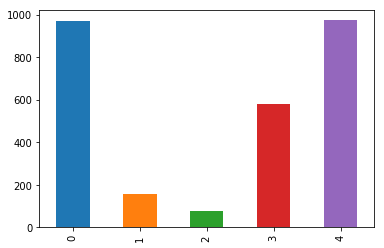

In [44]:
## Simple plotting

# See that we can index columns and rows by their names.
new_df['freq'].plot.bar()
plt.show()

,freq
name,
Bob,968
Jessica,155
Mary,77
John,578
Mel,973


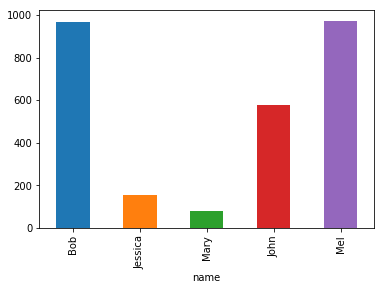

In [53]:
## Works better when we set names to rows

name_df = new_df.set_index('name')
display(name_df)
name_df['freq'].plot.bar()
plt.show()

## More complex data processing example
First prepare a data frame with random data.

In [59]:
import numpy as np

# set seed
np.random.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        count = np.random.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = np.random.choice(np.array(status), size = len(rng))
                        #[status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = np.random.choice(np.array(states), size = len(rng))
                        #[states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, count, rng))
        
    return Output



In [78]:
dataset = CreateDataSet(4)
r_df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
r_df.info()

r_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


,State,Status,CustomerCount,StatusDate
0,NY,1,973,2009-01-05
1,NJ,1,412,2009-01-12
2,GA,2,252,2009-01-19
3,fl,2,443,2009-01-26
4,fl,1,849,2009-02-02


## Excel IO

In [102]:
# POZOR: Nutno instalovat moduly:'xlwt', 'xlrd'

file_name = 'customer_reports.xls'
r_df.to_excel(file_name, index=False)
print('Data exported.')

# Parse a specific sheet 0
df = pd.read_excel(file_name, sheet=0, index_col='StatusDate')

print("Colum types:")
print(df.dtypes)

df.head()


Data exported.
Colum types:
State            object
Status            int64
CustomerCount     int64
dtype: object


,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,973
2009-01-12,NJ,1,412
2009-01-19,GA,2,252
2009-01-26,fl,2,443
2009-02-02,fl,1,849


## Prepare data
This section attempts to clean up the data for analysis.

1. Make sure the state column is all in upper case
2. Only select records where the account status is equal to "1"
3. Merge (NJ and NY) to NY in the state column
4. Remove any outliers (any odd results in the data set)


In [103]:
# Swee what states we have. Of course 'fl' insted of 'FL'.
df['State'].unique()

array(['NY', 'NJ', 'GA', 'fl', 'FL', 'TX'], dtype=object)

In [104]:
# Clean State Column, convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())
df['State'].unique()

array(['NY', 'NJ', 'GA', 'FL', 'TX'], dtype=object)

In [111]:
# Only grab where Status == 1
mask = df['Status'] == 1
df1 = df[mask]
df1.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,973
2009-01-12,NJ,1,412
2009-02-02,FL,1,849
2009-03-02,GA,1,406
2009-03-09,GA,1,290


In [114]:
# Convert NJ to NY
mask = df1.State == 'NJ'

# This produce a warnning as there is chained indexing.
# df1['State'][mask] = 'NY'

# This should be correct equivalent. But complain either.
df1.loc[mask, 'State'] = 'NY'


df1['State'].unique()

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array(['NY', 'FL', 'GA', 'TX'], dtype=object)

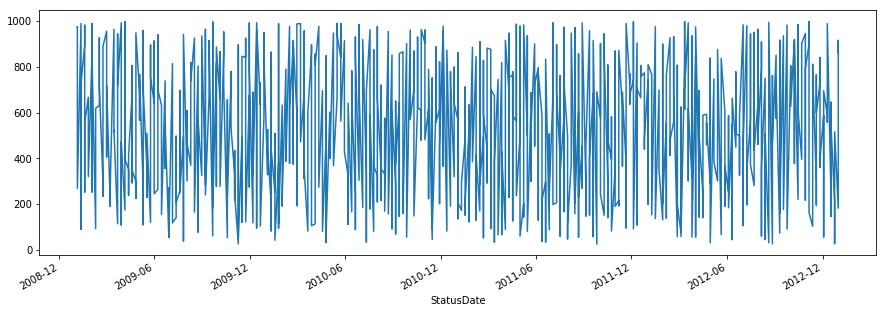

In [116]:
df['CustomerCount'].plot(figsize=(15,5));
plt.show()

In [128]:
# Reset index, to have StatusDate as regular column.
df_a = df.reset_index()
display(df_a.head())

# Group by State and StatusDate, sum rows with same index.
Daily = df_a.groupby(['State','StatusDate']).sum()
display(Daily.head())

# Group by State and StatusDat, use both max ans um aggregation
Daily = df_a.groupby(['State','StatusDate']).agg([np.sum, np.max])
display(Daily.head())

# Group by State and StatusDat, use max for Status, sum for Count
Daily = df_a.groupby(['State','StatusDate']) \
        .agg({'Status':np.max, 'CustomerCount':np.sum})
display(Daily.head())


,StatusDate,State,Status,CustomerCount
0,2009-01-05,NY,1,973
1,2009-01-12,NJ,1,412
2,2009-01-19,GA,2,252
3,2009-01-26,FL,2,443
4,2009-02-02,FL,1,849


Status  CustomerCount
State StatusDate                       
FL    2009-01-05       5            727
      2009-01-12       2             90
      2009-01-26       2            443
      2009-02-02       1            849
      2009-02-09       3            101

Status      CustomerCount     
                    sum amax           sum amax
State StatusDate                               
FL    2009-01-05      5    3           727  458
      2009-01-12      2    2            90   90
      2009-01-26      2    2           443  443
      2009-02-02      1    1           849  849
      2009-02-09      3    3           101  101

Status  CustomerCount
State StatusDate                       
FL    2009-01-05       3            727
      2009-01-12       2             90
      2009-01-26       2            443
      2009-02-02       1            849
      2009-02-09       3            101

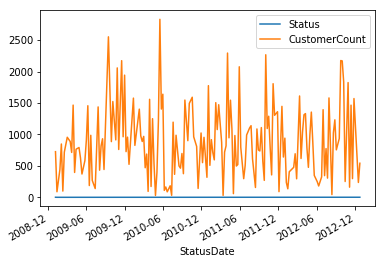

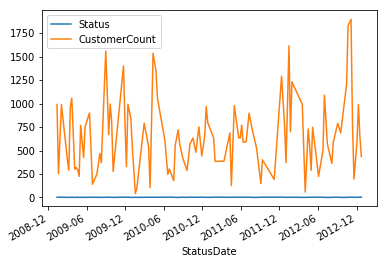

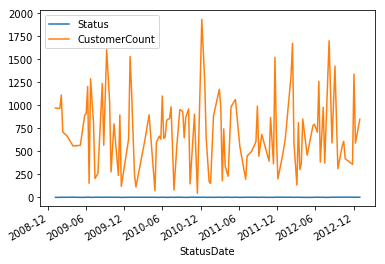

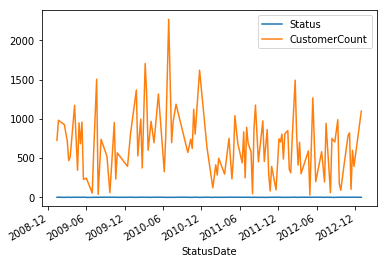

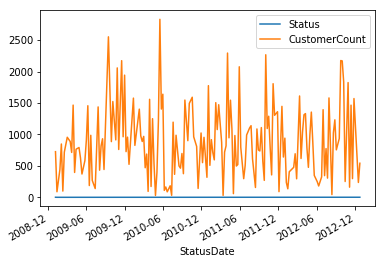

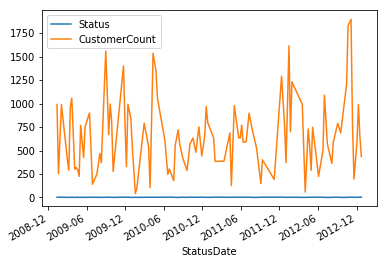

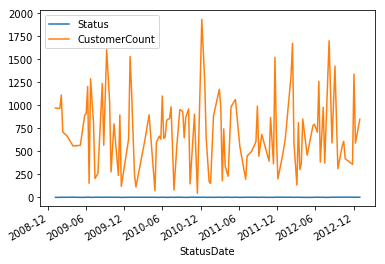

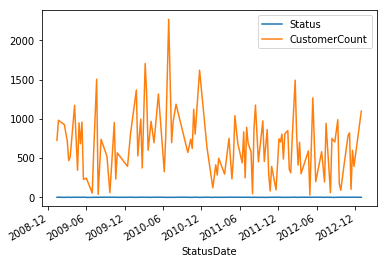

In [130]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();
plt.show()


# Seaborn - high level statistical plotting

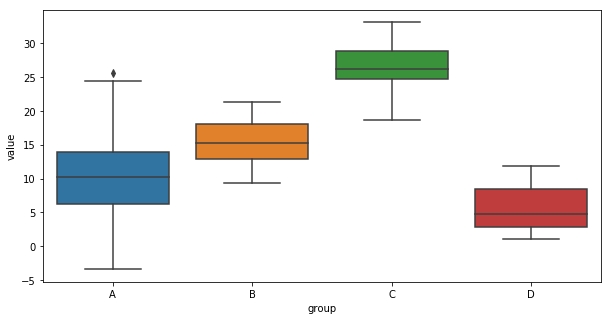

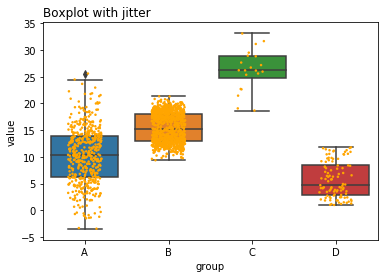

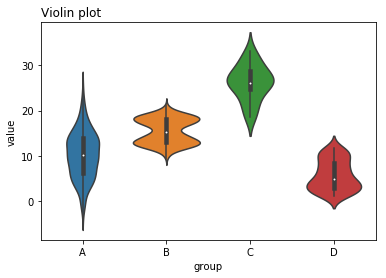

In [134]:
# libraries and data
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)
 
# Usual boxplot
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
sns.boxplot(x='group', y='value', data=df)
plt.show()

# Box plot with jitter.
ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")
plt.show()

# Violin plot.
sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")
plt.show()

# SymPY









## Resources

[Taming Math and Physics with SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf)

[Sympy Examples](https://github.com/sympy/sympy/wiki/Quick-examples)

## Basic objects

In [139]:
# Setup.
# Sympy is usefull mainly for interactive work so simplify notation as much as possible
# don't worry about cluttering the namespace.
from sympy import *
from IPython.display import display
# pretty printing in IPython
init_printing(use_latex='mathjax')


In [122]:
# Simple expressions
third = S(1)/3
display(third)
print(type(third))
3 * third




<class 'sympy.core.numbers.Rational'>


In [63]:
# Evaluation of fractions

S(1) / 3 + S(2) / 3

1

In [70]:
64**(S(1)/2 - S(1)/3)

2

In [76]:
64**(1.0/2 - 1.0/3)

2.0

In [31]:
# Arbitrary precision
pi.evalf(50)

3.1415926535897932384626433832795028841971693993751

In [78]:
# complex numbers works, but square root do no evaluate.
sqrt(1*I)

4 ____
╲╱ -1 

In [83]:
# Can go through equation solving.
x=Symbol('x')
solve(Eq(x**3,1))

⎡     1   √3⋅ⅈ    1   √3⋅ⅈ⎤
⎢1, - ─ - ────, - ─ + ────⎥
⎣     2    2      2    2  ⎦

In [91]:
# Define symbol's domain
x=Symbol('x', real=True)
solve(Eq(x**3,1))

[1]

In [92]:
# Not so good for integers
x=Symbol('x', integer=True)
solve(Abs(x) < 2)

-2 < x ∧ x < 2

## Expressions

In [93]:
expr = (x + 1)/(x-1) - (x-1)/(x+1)
expr

  x - 1   x + 1
- ───── + ─────
  x + 1   x - 1

In [94]:
expr**2

                 2
⎛  x - 1   x + 1⎞ 
⎜- ───── + ─────⎟ 
⎝  x + 1   x - 1⎠ 

## Simplification

In [35]:
simplify(expr)

 4⋅x  
──────
 2    
x  - 1

In [36]:

simplify(expr)

 4⋅x  
──────
 2    
x  - 1

In [127]:
a=Symbol('y')
b=Symbol('y')
a==b

True

In [130]:
c=Dummy('dummy_y')  # Try to remove 'y'
c==a

False

In [131]:
simplify(a+b+c)

In [140]:
# Complex (roots) are tricky
third = Rational(1,3)
expr = (7+sqrt(50))**third - (7-sqrt(50))**third
expr

3 __________   3 ___________
╲╱ 7 + 5⋅√2  - ╲╱ -5⋅√2 + 7 

In [50]:
x=Symbol('x', complex=True)
eq=Eq(expr, x)
eq

3 __________   3 ___________    
╲╱ 7 + 5⋅√2  - ╲╱ -5⋅√2 + 7  = x

In [141]:
Eq(expand(eq.lhs**3, basic=False), eq.rhs**3)

NameError: name 'eq' is not defined

In [143]:
expand(expr**3)

                    2/3 3 ___________     3 __________            2/3
10⋅√2 - 3⋅(7 + 5⋅√2)   ⋅╲╱ -5⋅√2 + 7  + 3⋅╲╱ 7 + 5⋅√2 ⋅(-5⋅√2 + 7)   

# Expression manipulation

- 'factor(expr)'
- 'expand(expr)'
- 'collect(expr)'
- 'cancel(fraction)'
- 'expr.subs({x: xexpr, y: yexpr})


In [142]:
x=Symbol('x')
solve(x**2+5*x-6)

In [144]:
factor(x**2+5*x-6)

In [148]:
expand((x-2)*(1-2*x), evaluate=False)

In [150]:
y=Symbol('y')
collect(expand((x-2)*(1-2*x*y)), x)

In [151]:
((x-2)*(1-2*x)).subs((x-2), (x-a))

In [154]:
a + y

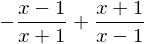

In [155]:
expr

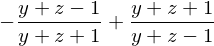

In [157]:
z = Symbol('z')
x = Symbol('x')
expr = (x + 1)/(x-1) - (x-1)/(x+1)


yz_expr = expr.subs({x: a+z})
yz_expr

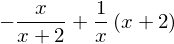

In [159]:
yz_expr.subs({'y': 1, 'z':x})

## Solve ...

In [19]:
sy.solve(x**2-4*x+5)

[2 - ⅈ, 2 + ⅈ]

In [144]:
sy.solve(sy.Abs(x-3)> 2)

NameError: name 'sy' is not defined

In [148]:
## Limits

x=Symbol("x")
display(limit(sin(x)/x, x, 0))

display(limit(sin(x)/x, x, oo))


1

0

In [151]:
# Differentiation

x=Symbol("x")
diff(sin(x), x )

cos(x)

In [170]:
# Derivatives of vectors
import sympy.vector as vec

S = vec.CoordSys3D('S')

r=Symbol("r")
phi=Symbol("phi")

xy = r*cos(phi)*S.i + r*sin(phi)*S.j


dr = diff(xy, r)
dphi = diff(xy, phi)

dr, dphi


((cos(φ)) S_i + (sin(φ)) S_j, (-r⋅sin(φ)) S_i + (r⋅cos(φ)) S_j)

In [182]:
# Series expansion
x=Symbol("x")
ln(x).series(x, 1, 6)

            2          3          4          5                         
     (x - 1)    (x - 1)    (x - 1)    (x - 1)         ⎛       6       ⎞
-1 - ──────── + ──────── - ──────── + ──────── + x + O⎝(x - 1) ; x → 1⎠
        2          3          4          5                             

In [218]:
# Integrate
x=Symbol("x")
k=Symbol("k")
n=Symbol("n", integer=True)
expr = integrate(cosh(x/k)*cos(x*pi*n), (x, 0,1))

# Result is Piecewise function:
display(expr)

# Get just second branch expression
formula = expr.args[1][0]

⎧                         -ⅈ         ⅈ 
⎪      1/2        for k = ─── ∨ k = ───
⎪                         π⋅n       π⋅n
⎪                                      
⎪    n       ⎛1⎞                       
⎨(-1) ⋅k⋅sinh⎜─⎟                       
⎪            ⎝k⎠                       
⎪───────────────        otherwise      
⎪   2  2  2                            
⎪  π ⋅k ⋅n  + 1                        
⎩                                      

In [221]:
python code(formula)

SyntaxError: invalid syntax (<ipython-input-221-ebb2378d2474>, line 1)

In [199]:
# Complex numbers
a=Symbol("a", real=True)
b=Symbol("b", real =True)
exp(a + b*I).expand(complex=True)


   a           a       
ⅈ⋅ℯ ⋅sin(b) + ℯ ⋅cos(b)

In [215]:
# Differential equations
k=Symbol("k")
P2=Symbol("P2")
n=Symbol("n", integer=True)
f=Function('f')
deq = Eq(f(x).diff(x,x) + f(x), cos(n*pi*x))

# Get general solution
sol = dsolve(deq).rhs
display(sol)

# Solv boundary conditions
constants = solve([sol.diff(x).subs(x,0), sol.subs(x,1) - P2])
display(constants)

# substitute
sol.subs(constants[0])

                        cos(π⋅n⋅x)
C₁⋅sin(x) + C₂⋅cos(x) - ──────────
                         2  2     
                        π ⋅n  - 1 

⎡⎧               n    2     2     ⎫⎤
⎢⎪           (-1)  + π ⋅P₂⋅n  - P₂⎪⎥
⎢⎨C₁: 0, C₂: ─────────────────────⎬⎥
⎢⎪             ⎛ 2  2    ⎞        ⎪⎥
⎣⎩             ⎝π ⋅n  - 1⎠⋅cos(1) ⎭⎦

⎛    n    2     2     ⎞                    
⎝(-1)  + π ⋅P₂⋅n  - P₂⎠⋅cos(x)   cos(π⋅n⋅x)
────────────────────────────── - ──────────
      ⎛ 2  2    ⎞                 2  2     
      ⎝π ⋅n  - 1⎠⋅cos(1)         π ⋅n  - 1 

## Expression evaluation

In [163]:

x, y = symbols('x y')
expr = 3*x**2 + log(x**2 + y**2 + 1)


In [164]:
from timeit import timeit

# Simplest method: using subs
def eval1():
    expr.subs({x: 17, y: 42}).evalf()
    
timeit(eval1, number=10000)

2.0710132859967416

In [165]:
import math 

# Using handmade function
def my_expr(x, y):
    return 3*x**2 + math.log(x**2 + y**2 + 1)

def eval2():
    my_expr(17, 42)
    
timeit(eval2, number=10000)

0.011852617011754774

In [166]:
# Let SymPy to make the function from expression
g = lambdify([x, y], expr, modules=['math'])

def eval3():
    g(17, 42)
    
timeit(eval3, number=10000)    

0.011655547001282685